In [ ]:
# 1. 코렙에서 한글 폰트 설치하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 2. 설치가 다 되면 메뉴-런타임-런타임 다시시작

In [1]:
# 3. 한글폰트 적용하기
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

Text(0.5, 1.0, '한글')

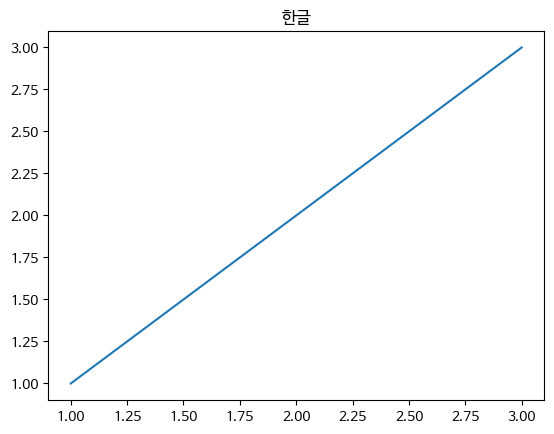

In [5]:
plt.plot([1, 2, 3], [1, 2, 3])
plt.title('한글')

뉴스기사에서 명사 키워드를 분석
  - 워드 클라우드
  - 한글은 영어와 같은 절차로 수행

형태소
  - 언어에서 의미가 있는 가장 작은 단위

품사태깅
  - 형태소의 뜻과 문맥을 고려해서 품사를 붙이는 것
  - 가방에 들어가신다
    - 가방, 에, 들어가, 시, ㄴ다  

In [ ]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

In [8]:
from konlpy.tag import Okt
Okt().morphs("공부하기 싫다. ㅋㅋㅋ ")

['공부', '하기', '싫다', '.', 'ㅋㅋㅋ']

In [9]:
import json
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [ ]:
inputFileName = '/content/etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명.json'
data = json.loads(open(inputFileName, 'r', encoding='utf-8').read())
data

In [15]:
# 각 딕셔너리의 message 의 값만 추출 품사가 명사인 단어만 추출
message = ''
for item in data:
  # r'[^\w]'  공백을 제외한 나머지
  message = re.sub(r'[^\w]','',item['message']) + message

In [16]:
message

'4차산업혁명의이해MasteringtheFourthIndustrialRevolution23일폐막한다보스포럼에서는4차산업혁명기대와우려가교차했는데요구글애플페이스북삼성전자LG전자가앞다퉈4차산업혁명흐름에뛰어들고있습니다4차산업혁명시대대비대선국면이지만법안의시급성때문에4차산업혁명대비법제개편논의가불붙을전망입니다전자신문TV라이브예고이번전자신문TV는4차산업혁명과과학기술영상컨퍼런스를생중계합니다광운대학교이승현교수님을모시고진행하는이번행사는VRAR기술과몰힙형미디어에대해설명해주신다고합니다이번행사는전자신문Entertainment와가상현실스튜디오솔루션을제작한다림비젼중견기업TV와함께4차산업정보채널IBSBITTechBusinessSNSBroadcast를통해진행합니다IBSB는전세계4차산업혁명의현장의생생한IT소식과정보컨퍼런스의강연VOD정보를VR기술과원격Live방송기술을중심으로시간과거리를초월하는실시간TELEPresentation기술의새로운방송서비스입니다이런유익한강의를전자신문페이스북을통해서시청하실수있습니다많은관심부탁드립니다미래창조과학부가주최하고전자신문사한국경제신문한국정보통신진흥협회KAIT주관으로24일서울강남구삼성동코엑스에서개막된월드IT쇼WIS2017은4차산업혁명이더이상개념이아니라현실로다가왔음을입증했습니다통합개혁행보에서빠른움직임을보였지만4차산업혁명등신성장동력창출에서는한발짝도못나갔다는평입니다4차산업혁명대응은일자리창출과함께문재인정부주요국정과제인데도우선순위에서밀렸다는지적전자신문TV라이브직격인터뷰서울산업진흥원SBA주형철대표이사최근각급공공기관들이4차산업혁명기를맞은국내중소기업의경쟁력과일자리창출을위해노력하고있는데요이번전자신문TV라이브는중소기업활성화와일자리창출에앞장서는공공기관중대표적사례로꼽히는서울산업진흥원주형철대표이사를모시고다양한이야기를듣는시간으로진행됩니다전자신문전자신문TV서울산업진흥원SBA주형철소성렬중앙부처공무원5134차산업혁명관련가장시급히대응해야할기술적과제로빅데이터활용꼽4차산업혁명대응에가장강점분야는5세대이동통신건강한산업생태계조성노력강조혹시우리나라도4차산업혁명시대떠오르는일자리전략으로강추전자신문TV라이브SBA신직업위

In [ ]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N

In [29]:
count = Counter(message_N)
count = dict(count)
# word_count.pop('차')
word_count = {}
for key,value in count.items():
  if len(key) != 1:
    word_count[key] = value

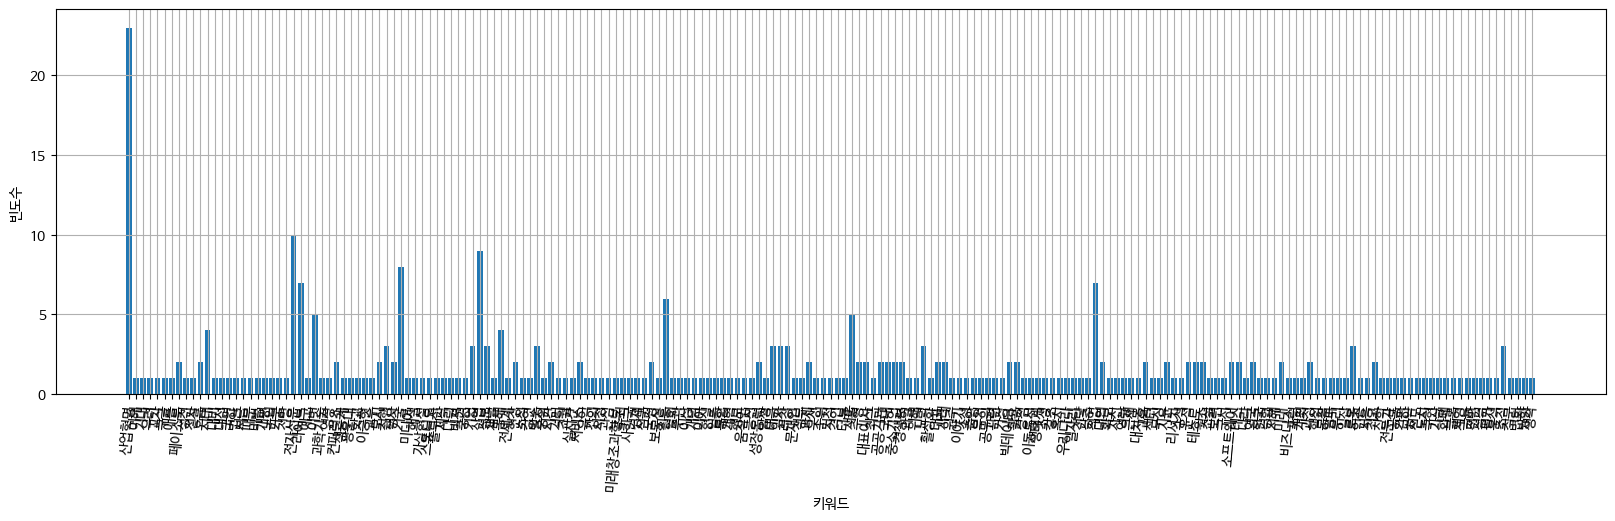

In [34]:
plt.figure(figsize=(20,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
plt.bar(range(len(word_count)), word_count.values())
plt.xticks(range(len(word_count)), word_count.keys(), rotation=85)
plt.show()